In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
df = pd.read_csv("H:\Tugas\Belajar\Python\mtcars.csv")
df

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [19]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [20]:
df.sort_values('mpg')

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
15,Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4
14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
23,Camaro Z28,13.3,8,350.0,245,3.73,3.840,15.41,0,0,3,4
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
16,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8
13,Merc 450SLC,15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3
22,AMC Javelin,15.2,8,304.0,150,3.15,3.435,17.30,0,0,3,2
21,Dodge Challenger,15.5,8,318.0,150,2.76,3.520,16.87,0,0,3,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.50,0,1,5,4


In [23]:
df = pd.read_csv("H:\Tugas\Belajar\Python\mtcars.csv")
df

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,mpg_level
0,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4,low
1,Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4,low
2,Camaro Z28,13.3,8,350.0,245,3.73,3.840,15.41,0,0,3,4,low
3,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,low
4,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4,low
5,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8,low
6,Merc 450SLC,15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3,low
7,AMC Javelin,15.2,8,304.0,150,3.15,3.435,17.30,0,0,3,2,low
8,Dodge Challenger,15.5,8,318.0,150,2.76,3.520,16.87,0,0,3,2,low
9,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.50,0,1,5,4,low


In [48]:
df.pivot(index='mpg_level',columns='model')

mpg                                                  \
model     AMC Javelin Cadillac Fleetwood Camaro Z28 Chrysler Imperial   
mpg_level                                                               
hard              NaN                NaN        NaN               NaN   
low              15.2               10.4       13.3              14.7   
medium            NaN                NaN        NaN               NaN   

                                                                        \
model     Datsun 710 Dodge Challenger Duster 360 Ferrari Dino Fiat 128   
mpg_level                                                                
hard             NaN              NaN        NaN          NaN     32.4   
low              NaN             15.5       14.3         19.7      NaN   
medium          22.8              NaN        NaN          NaN      NaN   

                     ...      carb                                    \
model     Fiat X1-9  ... Merc 280C Merc 450SE Merc 450SL Merc 450SLC   
mpg_level            ...                                               
hard            NaN  ...       NaN        NaN        NaN         NaN   
low             NaN  ...       4.0        3.0        3.0         3.0   
medium         27.3  ...       NaN        NaN        NaN         NaN   

                                                                               \
model     Pontiac Firebird Porsche 914-2 Toyota Corolla Toyota Corona Valiant   
mpg_level                                                                       
hard                   NaN           NaN            1.0           NaN     NaN   
low                    2.0           NaN            NaN           NaN     1.0   
medium                 NaN           2.0            NaN           1.0     NaN   

                      
model     Volvo 142E  
mpg_level             
hard             NaN  
low              NaN  
medium           2.0  

[3 rows x 352 columns]

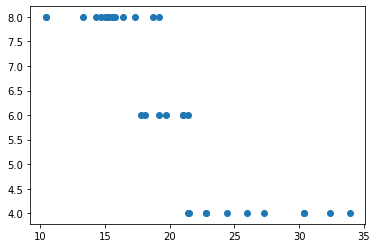

In [37]:
plt.scatter(df.mpg, df.cyl)

In [ ]:
#Berdasarkan scatterplot di atas menunjukkan besarnya silinder mobil berhubungan dengan semakin rendanya konsumsi bensin kendaraan.

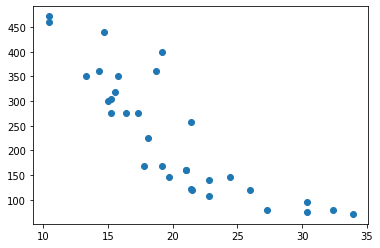

In [35]:
plt.scatter(df.mpg, df.disp)

In [ ]:
#Untuk variabel miles per gallon dan display menunjukkan bahwa terdapat hubungan, yang mana semakin tingginya konsumsi bensin maka display kendaraan juga semakin rendah begitu pula sebaliknya

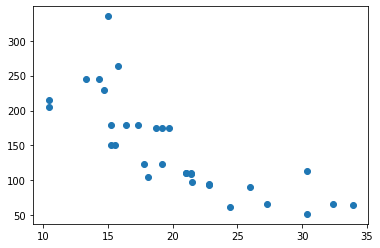

In [38]:
plt.scatter(df.mpg, df.hp)

In [ ]:
#Sedangkan variable mpg dan hp, menunjukkan bahwa tingginya konsumsi bahan bakar maka semakin rendahnya tenaga mobil tersebut, begitu pula sebaliknya

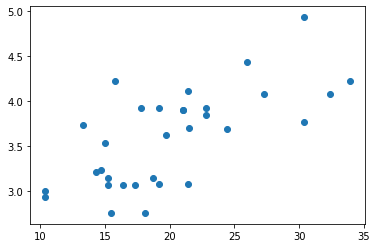

In [40]:
plt.scatter(df.mpg, df.drat)

In [ ]:
#Pada hubungan variabel antara mpg dan drat tidak terlalu menunjukkan hubungan yang berarti di mana pada plot memperlihatkan jika plot antara dua variabel cenderung menyebar

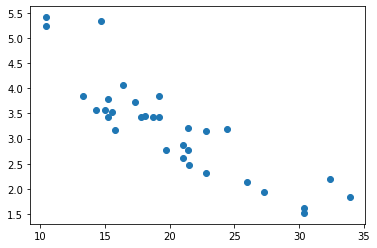

In [36]:
plt.scatter(df.mpg, df.wt)

In [ ]:
#Pada variabel mpg dan wt menunjukkan perbandingan terbalik, yang mana semakin tingginya mpg maka berat kendaraan (wt) pada kendaraan juga semkain ringan

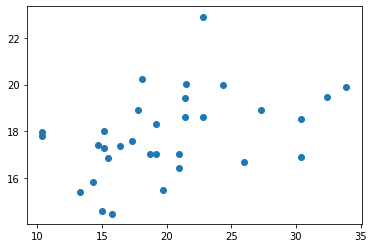

In [41]:
plt.scatter(df.mpg, df.qsec)

In [ ]:
#Hubungan antara variabel mpg dan qsec cenderung tidak menunjukkan hubungan yang terlalu berarti, di mana titik plotnya cenderung tersebar tidak mengikuti tren

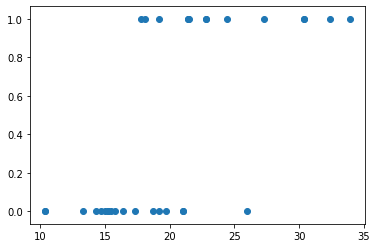

In [42]:
plt.scatter(df.mpg,df.vs)

In [ ]:
#Hubungan antara mpg dan vs memperlihatkan jika semakin rendahnya mpg maka lebih cenderung pada rendahnya vs. Meskipun terdapat sebagian titik di mana kendaraan dengan konsumsi rendah memiliki vs tinggi begitupun sebaliknya

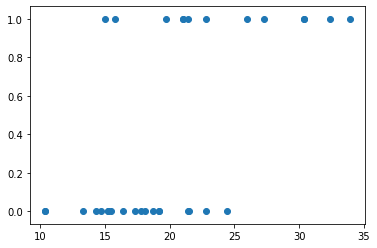

In [43]:
plt.scatter(df.mpg, df.am)

In [ ]:
#Pada variabel am dan mpg menunjukkan mobil berkonsumsi tinggi cenderung berjenis automatic, dan sebaliknya mobil tanpa manual justru memiliki konsumsi lebih rendah

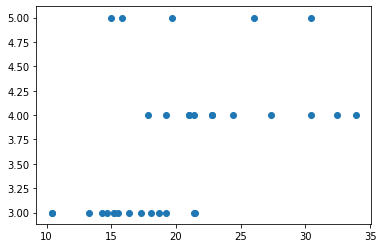

In [44]:
plt.scatter(df.mpg, df.gear)

In [ ]:
#Pada grafik scatterplot menunjukkan bahwa kendaraan bermpg rendah cenderung yang memiliki gigi tiga, sedangkan kendaraan bergigi empat dan lima cenderung memiliki konsumsi tinggi

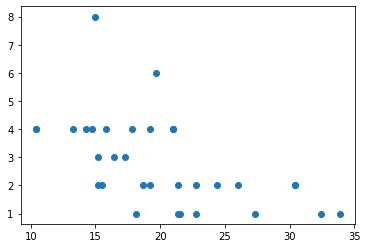

In [45]:
plt.scatter(df.mpg, df.carb)

In [ ]:
#Kendaraan yang memiliki carburator rendah cenderung mempunyai konsumsi bahan bakar yang tinggi.